<a href="https://colab.research.google.com/github/angela-kralevska/COVID19_MK_project/blob/master/COVID_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
  <img alt="COVID **LOGO**" height="30px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/SARS-CoV-2_without_background.png/895px-SARS-CoV-2_without_background.png" hspace="10px" vspace="0px">
  Предвидување на број на новозаразени од Корона вирус во Македонија
</h1>
<center><h3><i>Ангела Кралевска<i><h3></center>

---

# Монтирање на Google Drive податочниот систем

За да ја поставам работната околина, ќе го користам пример кодот што Google го обезбедува во секцијата за Google Sheets. Кодот во основа се справува со автентикацијата и ја увезува ```gspread``` библиотеката што овозможува комуникација со Google Sheets. 

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

Исто така ќе направам import на уште неколку библиотеки како **Pandas** (за обработка и анализа на податоци), **Matplotlib** (за визуелизација) и др.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas.util.testing as tm

# Вчитување на податоците

Откако ја поставив работната околина, следно е да ги вчитам податоците. Податоците со кои што ќе работам се преземени од сајтот на владата на Република Македонија. Во базата на податоци се прикажани детални статистики за дневниот број на заболени, оздравени и починати од Корона вирусот на територијата на Македонија. 

Библиотеката ```gspread``` овозможува лесна комуникација со Google Sheets, се што ми треба е URL-то. За пристап до Google Sheet, ја користам функцијата ```gspread``` ``` open_by_url () ```, која што ја пристапувам со објектот ```gc``` што го дефинирав погоре.

Откако ќе ги добијам сите вредности, ќе ги конвертирам во **Pandas DataFrame**.

In [27]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1xZPVGysIKnsvs4SawQZk6qJ13WkjF0W7aY7VR_84fdA/edit#gid=0')
sheet = wb.sheet1
data = sheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
df

,Date,Заболени,Излечени,Починати вкупно
1,"Feb 26, 2020",1,0,0
2,"Feb 27, 2020",1,0,0
3,"Feb 28, 2020",1,0,0
4,"Feb 29, 2020",1,0,0
5,"Mar 1, 2020",1,0,0
...,...,...,...,...
74,"May 9, 2020",1622,1112,91
75,"May 10, 2020",1642,1136,91
76,"May 11, 2020",1664,1200,91
77,"May 12, 2020",1674,1205,92


Со вака вчитани податоци имаме мал проблем, бидејќи типот на сите податоци е автоматски сетиран како string.

In [28]:
# пристап до првата редица, колоната за заболени

type(df.iloc[0][1])

str

За да го решам овој проблем ќе направам dictionary во кој ќе ги дефинирам типовите на податоци.

In [29]:
new_df_schema = {
'Датум': df['Date'].astype(str),
'Заболени': df['Заболени'].astype(int),
'Излечени': df['Излечени'].astype(int),
'Починати': df['Починати вкупно'].astype(int)
}

covid19_mk_df = pd.DataFrame(new_df_schema)
covid19_mk_df['Датум'] = pd.to_datetime(covid19_mk_df['Датум'])

covid19_mk_df

,Датум,Заболени,Излечени,Починати
1,2020-02-26,1,0,0
2,2020-02-27,1,0,0
3,2020-02-28,1,0,0
4,2020-02-29,1,0,0
5,2020-03-01,1,0,0
...,...,...,...,...
74,2020-05-09,1622,1112,91
75,2020-05-10,1642,1136,91
76,2020-05-11,1664,1200,91
77,2020-05-12,1674,1205,92


Може да провериме дали типот на податоци е точно дефиниран.

In [30]:
covid19_mk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 1 to 78
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Датум     78 non-null     datetime64[ns]
 1   Заболени  78 non-null     int64         
 2   Излечени  78 non-null     int64         
 3   Починати  78 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.6 KB


Бидејќи нашите пофатоци се акумулирани, ќе ја одземеме секоја вредност од претходната за да ги добиеме во формата која ја сакаме. Наместо вкупно заболени, излечени и починати, ќе го добиеме бројот на заболени, излечени и починати по ден.

In [31]:
cov_mk = covid19_mk_df.diff()
values = {'Заболени': 1, 'Излечени': 0, 'Починати': 0}
cov_mk = cov_mk.fillna(value=values)
cov_mk['Датум'] = covid19_mk_df['Датум']
cov_mk

,Датум,Заболени,Излечени,Починати
1,2020-02-26,1.0,0.0,0.0
2,2020-02-27,0.0,0.0,0.0
3,2020-02-28,0.0,0.0,0.0
4,2020-02-29,0.0,0.0,0.0
5,2020-03-01,0.0,0.0,0.0
...,...,...,...,...
74,2020-05-09,36.0,13.0,1.0
75,2020-05-10,20.0,24.0,0.0
76,2020-05-11,22.0,64.0,0.0
77,2020-05-12,10.0,5.0,1.0


# Начин да се вчитаат податоци доколку би немале готов .csv фајл

Web scraping во Python се однесува на извлекување корисни податоци од веб-страниците кои се напишани во HTML. За да го направам тоа ќе треба да инсталирам неколку пакети.

In [32]:
!pip install requests
!pip install beautifulsoup4
import requests
import bs4

Следно го копираме URL-то и ги извлекуваме и форматираме податоците. На страната која ни беше посочена како извор на податоци може да се најде податок само за еден ден (нема или јас не можам да најдам табела за повеќе денови, освен дневните известувања кои не се пишувани по шема и е тешко од нив да се извлечат токму тие бројки што ни требаат).

In [33]:
WP_URL = "https://koronavirus.gov.mk/en/media-center"

# Правиме лажен агент на корисник за веб страната да мисли дека пристапува човек 
web_page = bs4.BeautifulSoup(requests.get(WP_URL, headers={
    "UserAgent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.183 Safari/537.36"
}).text, "lxml")

# Наоѓање на датумот на кој се последно променети податоците
date = web_page.find_all(name="div", attrs={"class": "et_pb_text_14"})[0].find_all(name="div", attrs={"class": "et_pb_text_inner"})[0].text[32:40]

# Наоѓање на податоците
table = web_page.find_all(name="div", attrs={"class": "et_pb_row_3"})[0]
title1 = table.find_all(name="div", attrs={"class": "et_pb_column"})[1].find_all(name="div", attrs={"class": "et_pb_text_inner"})[1].text
data1 = table.find_all(name="div", attrs={"class": "et_pb_column"})[1].find_all(name="div", attrs={"class": "et_pb_text_inner"})[0].text
title2 = table.find_all(name="div", attrs={"class": "et_pb_column"})[2].find_all(name="div", attrs={"class": "et_pb_text_inner"})[1].text
data2 = table.find_all(name="div", attrs={"class": "et_pb_column"})[2].find_all(name="div", attrs={"class": "et_pb_text_inner"})[0].text
title3 = table.find_all(name="div", attrs={"class": "et_pb_column"})[3].find_all(name="div", attrs={"class": "et_pb_text_inner"})[1].text
data3 = table.find_all(name="div", attrs={"class": "et_pb_column"})[3].find_all(name="div", attrs={"class": "et_pb_text_inner"})[0].text   

# Форматирање на податоците
data_frame = pd.DataFrame({"Date":[date], 
                   title1:[data1],  
                   title2:[data2], 
                   title3:[data3]})

data_frame.head()


,Date,Total number of infected with COVID-19,Cured from COVID-19,Deceased from COVID-19
0,03.05.20,1511,945,84


# Визуелизација на податоците

Во овој дел ќе направам визуелизација на податоците, за да имам подобра претстава за нив.

In [0]:
from tqdm import tqdm
from pylab import rcParams
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
Double_Rainbow_Color_Scheme = ["#1076E2", "#8BE071", "#FC9127", "#FFFB62", "#D71729", "#673295"]
sns.set_palette(sns.color_palette(Double_Rainbow_Color_Scheme))
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

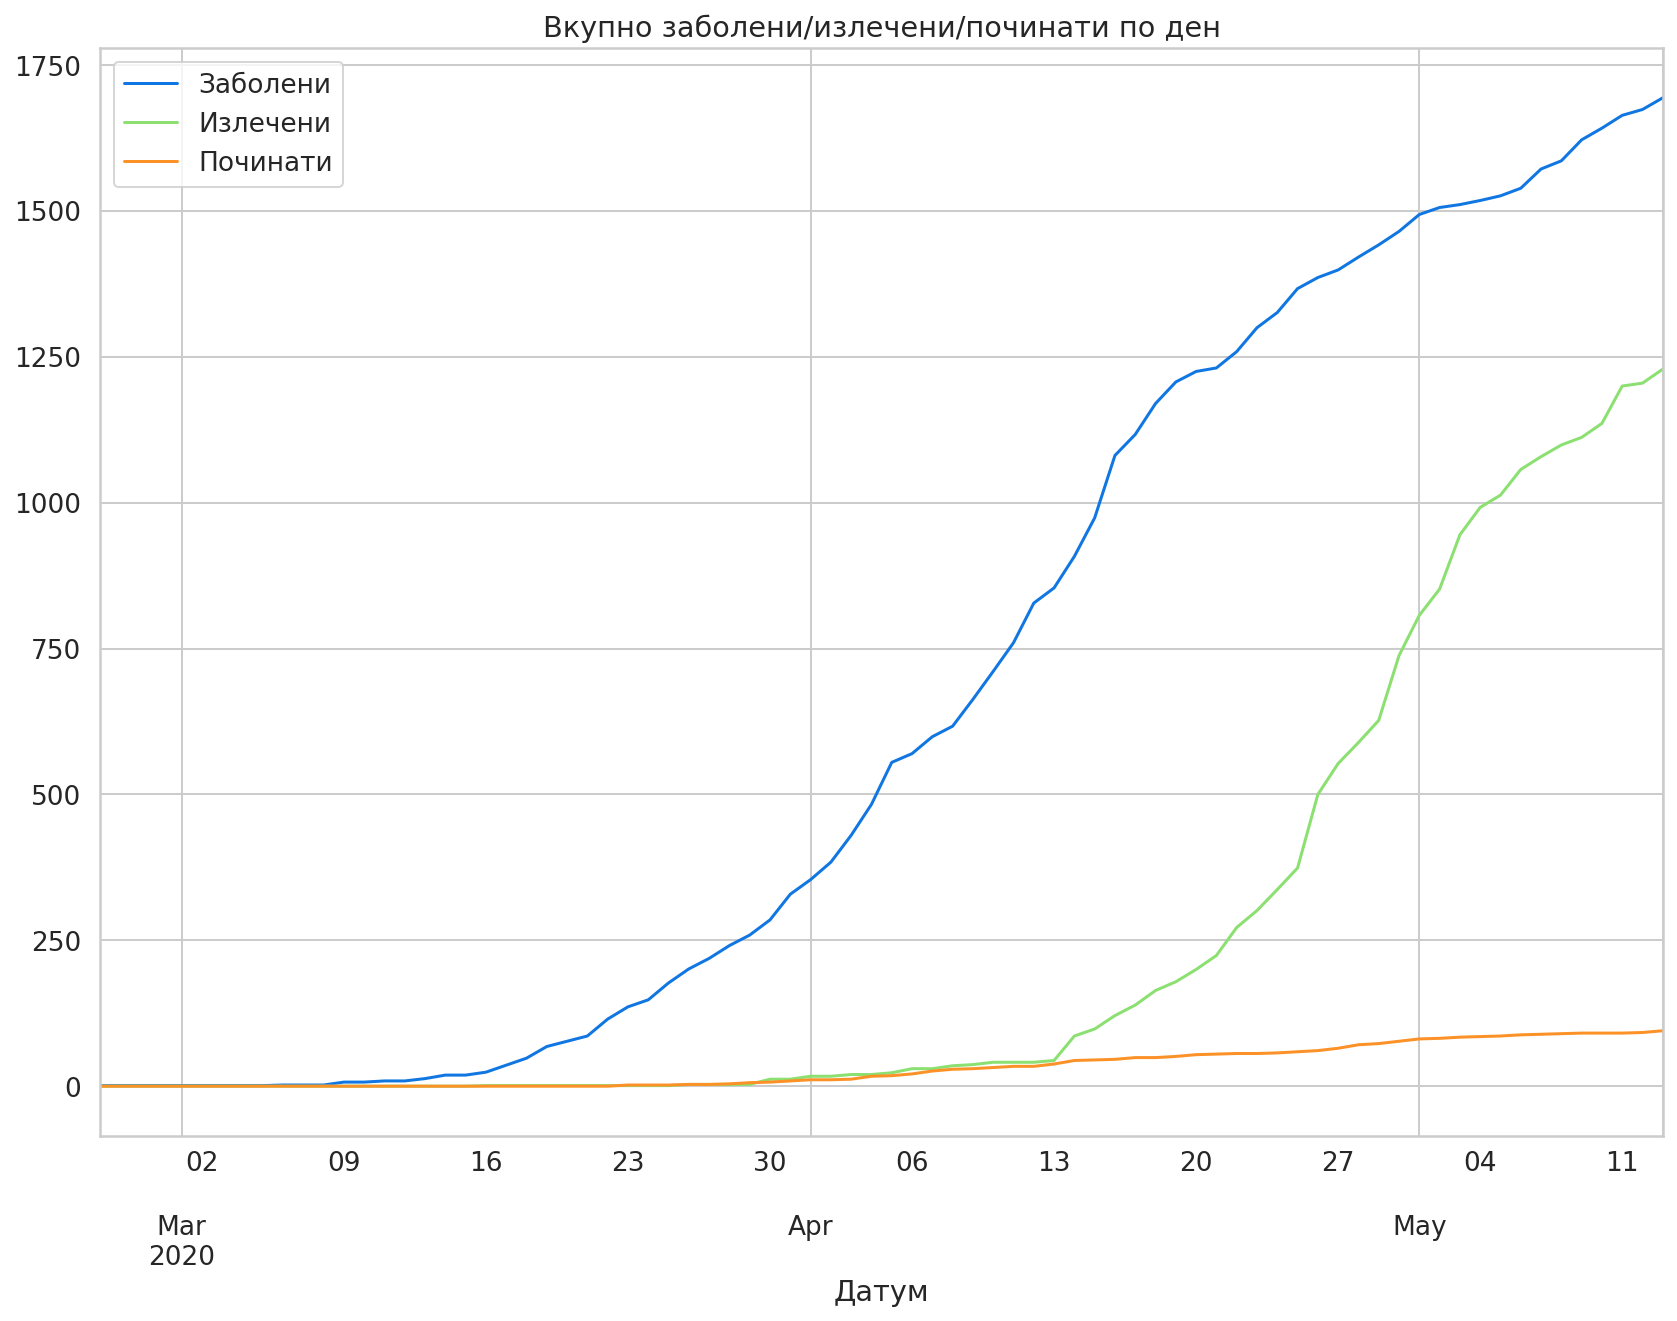

In [35]:
#@title График за претставување на вкупниот број на заболени/излечени/починати по ден 

covid19_mk_df.set_index('Датум')['Заболени'].plot();
covid19_mk_df.set_index('Датум')['Излечени'].plot();
covid19_mk_df.set_index('Датум')['Починати'].plot();
plt.title("Вкупно заболени/излечени/починати по ден");
plt.legend(['Заболени', 'Излечени', 'Починати'], loc='upper left');

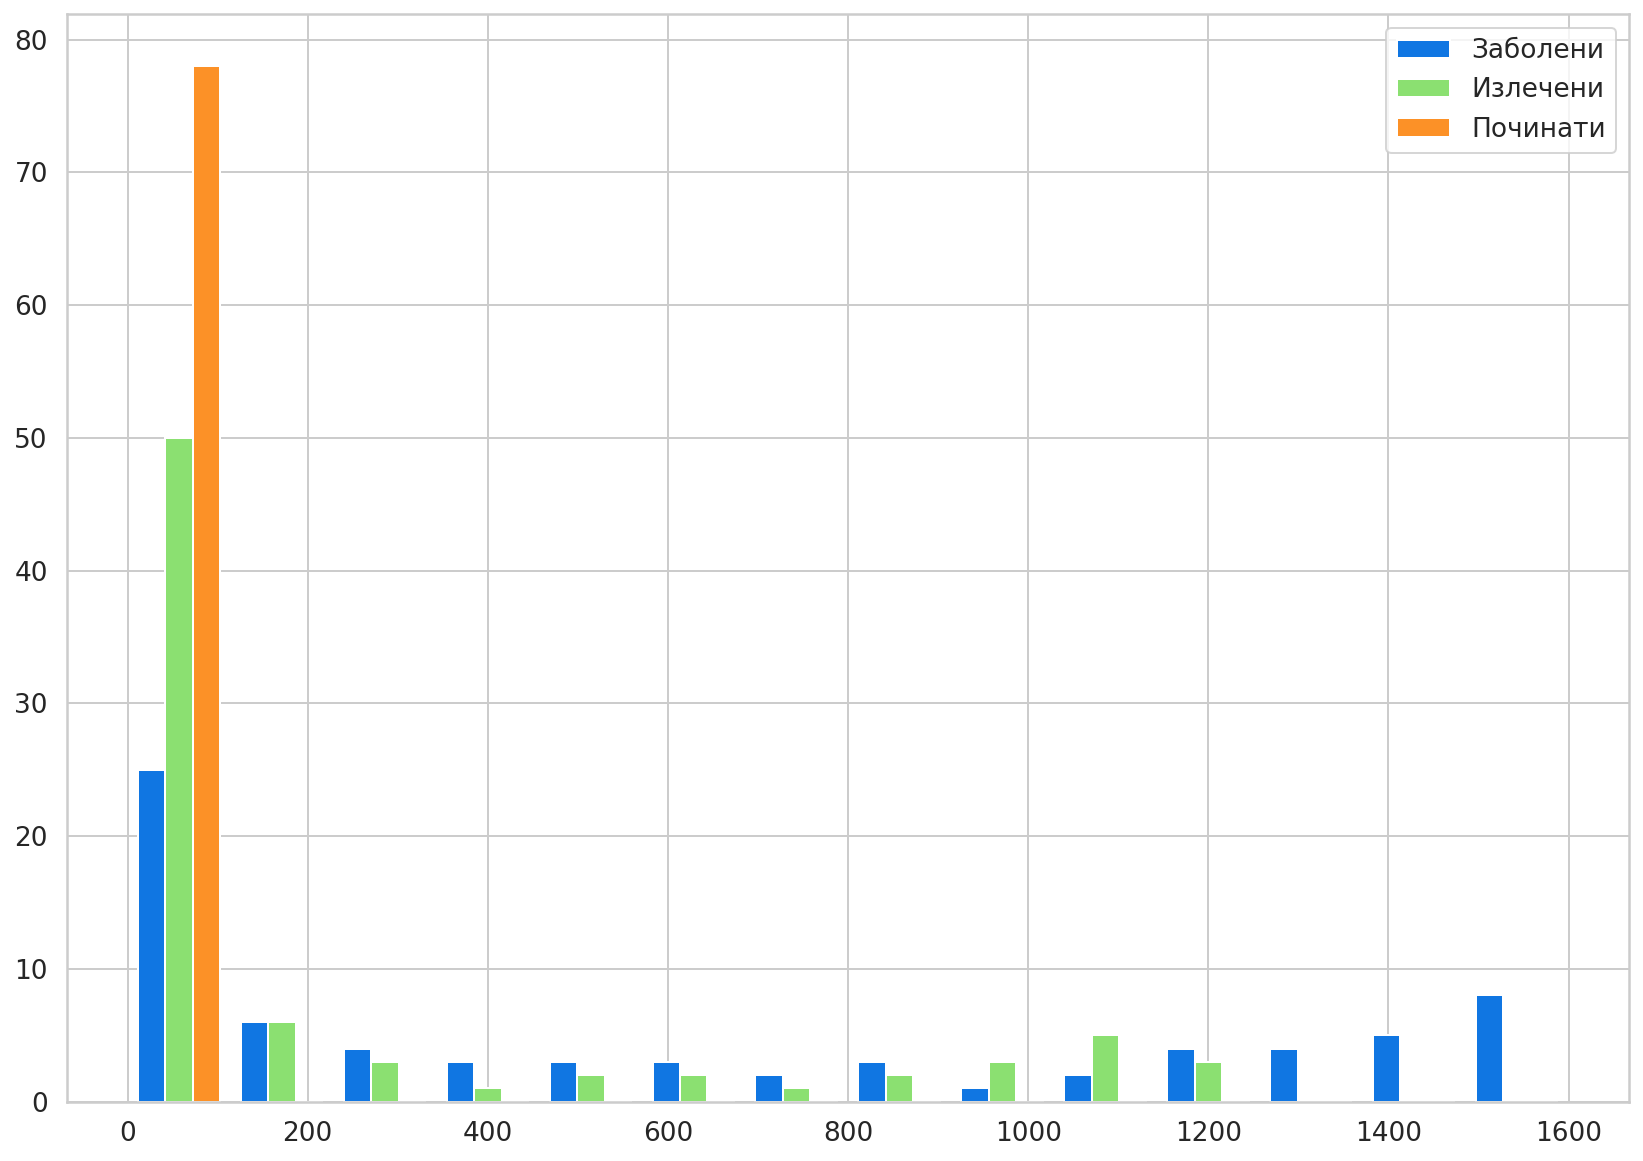

In [36]:
#@title Хистограм за да се воочи распределбата на податоците

x = covid19_mk_df['Заболени']
y = covid19_mk_df['Излечени']
z = covid19_mk_df['Починати']

bins = np.linspace(0, 1600, 15)

plt.hist([x, y, z], bins, label=['Заболени', 'Излечени', 'Починати'])
plt.legend(loc='upper right')
plt.show()

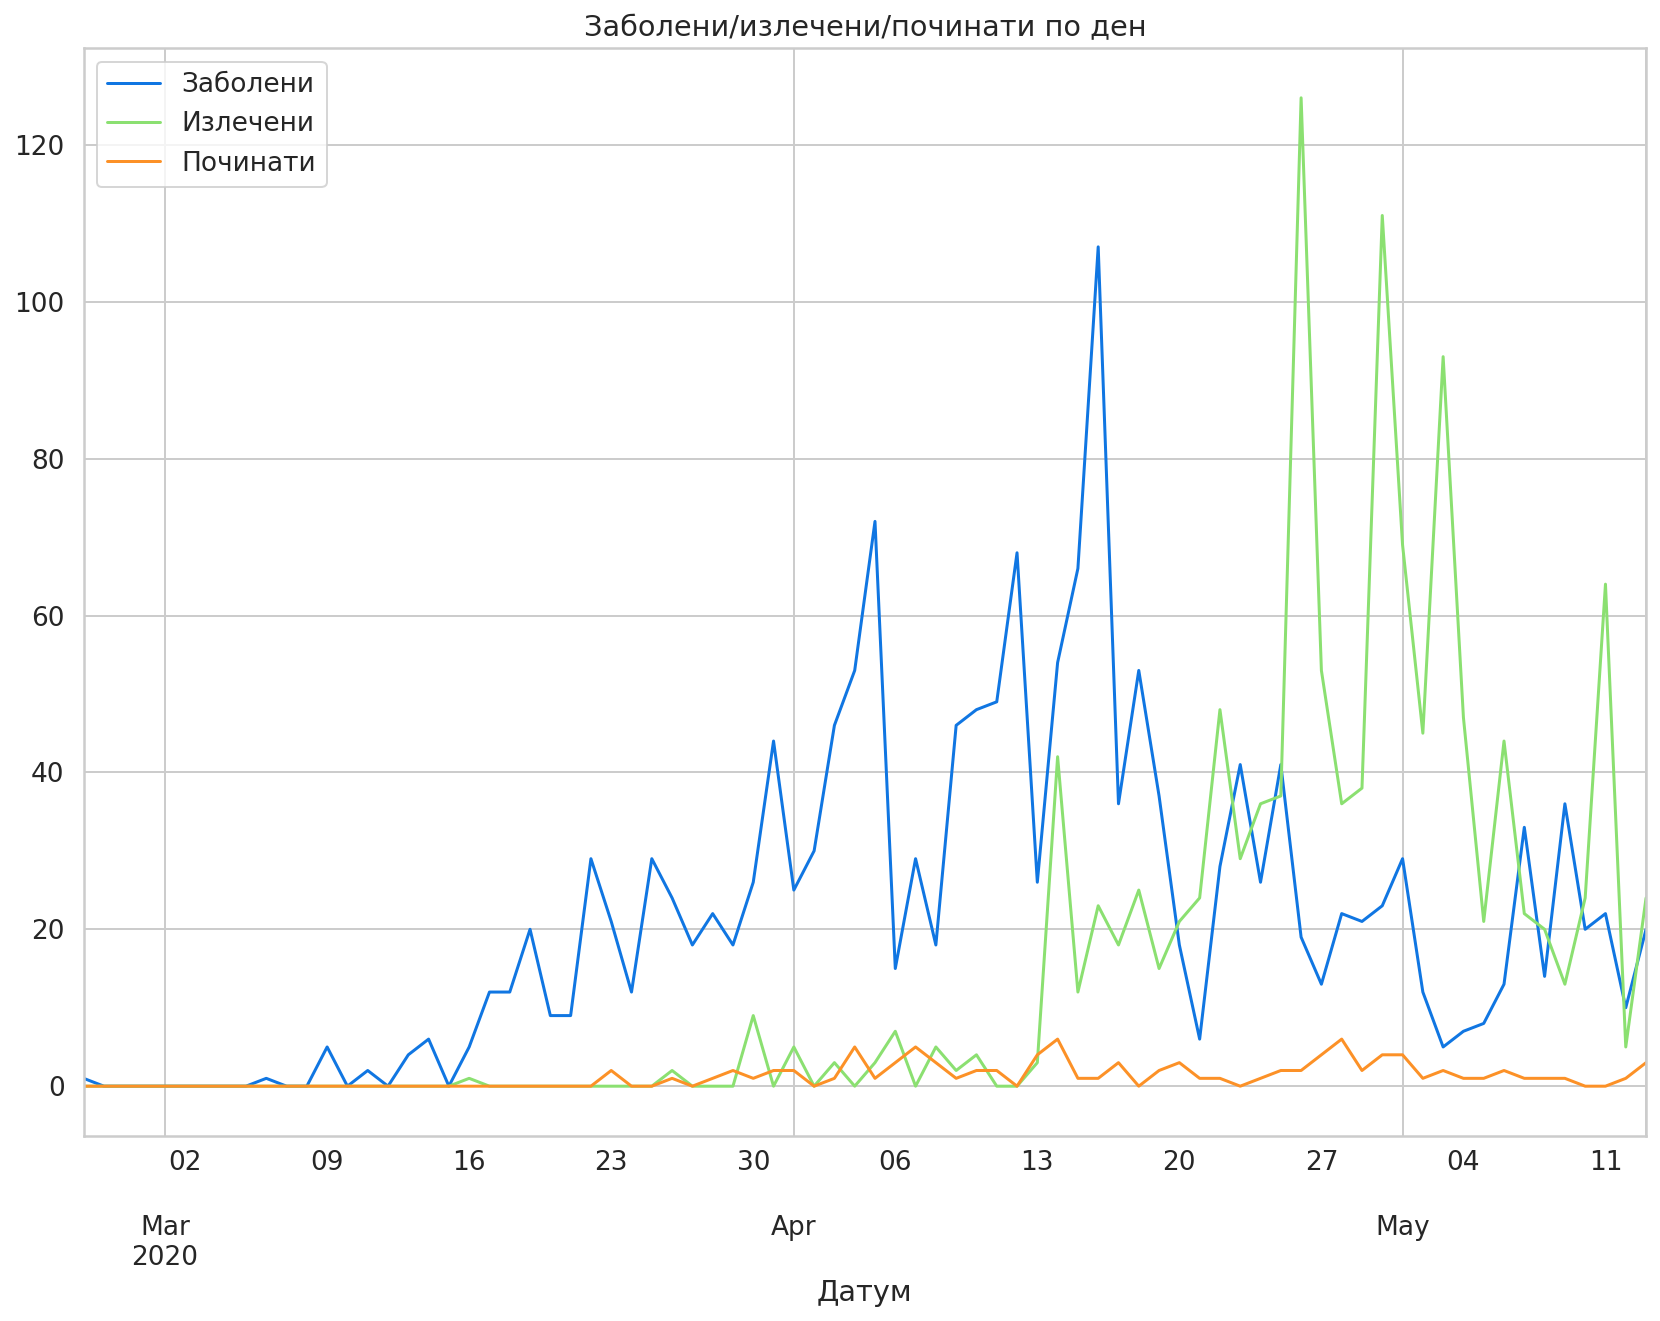

In [37]:
#@title График за претставување на бројот на заболени/излечени/починати по ден

cov_mk.set_index('Датум')['Заболени'].plot();
cov_mk.set_index('Датум')['Излечени'].plot();
cov_mk.set_index('Датум')['Починати'].plot();
plt.title("Заболени/излечени/починати по ден");
plt.legend(['Заболени', 'Излечени', 'Починати'], loc='upper left');

# Предвидување со логистичка регресија

Логистичката функција, исто така наречена сигмоидна функција била развиена од статистичарите за да ги опише својствата на растот на населението, па така сметам дека би била добра и за предвидување на растот на новозаболени од Корона вирусот. Исто така прочитав дека логистичкиот модел се користел и во епидемиологијата за да се предвиди веројатноста за појава на одредена болест според факторите на ризик. Сметам дека со овој модел може до некој степен да се предвиди порастот на заболени од Ковид-19.

Text(0, 0.5, 'Заболени')

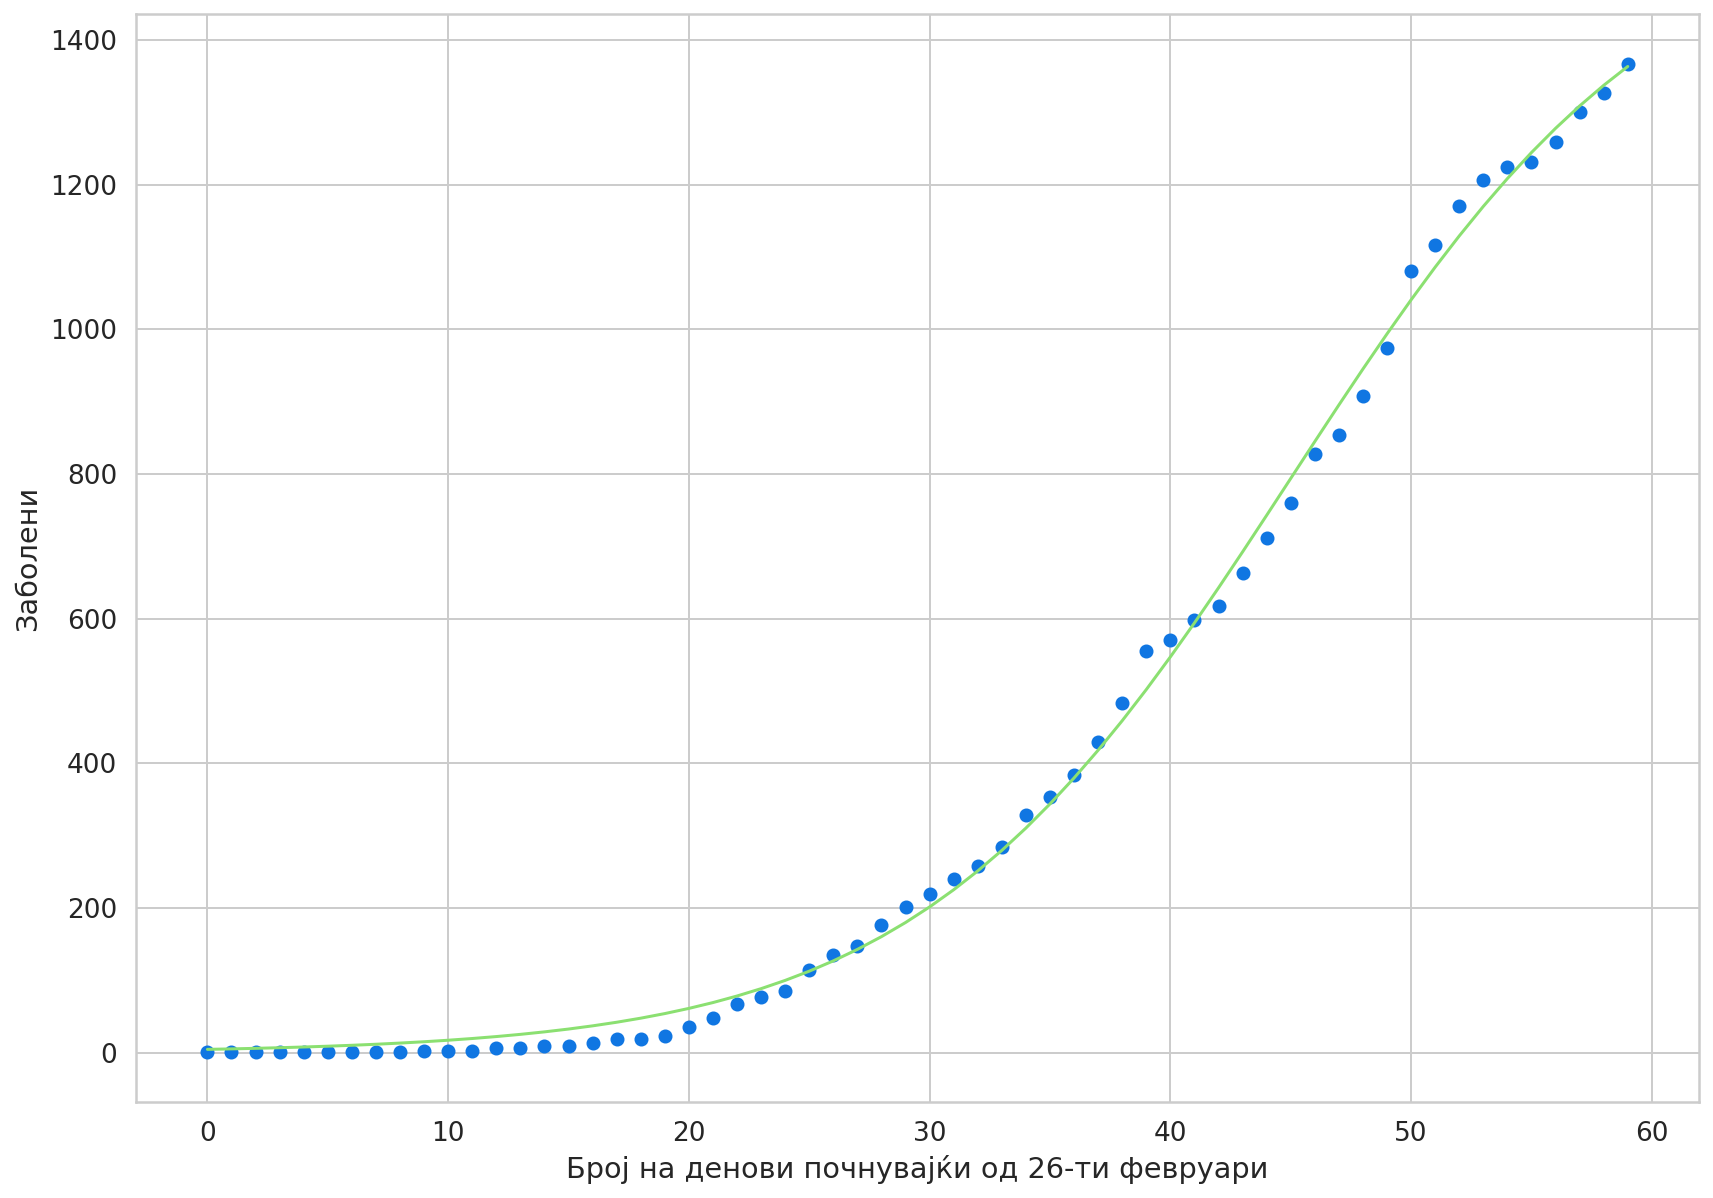

In [38]:
from scipy import optimize

number_train = 60
number_valid = 18


def logistic_function(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b


y = covid19_mk_df.loc[(covid19_mk_df.index)<=number_train, 'Заболени']
x = list(range(0, len(y)))

# Почетна претпоставка
p0 = [0,1,1,0]

(a_, b_, c_, d_), cov = optimize.curve_fit(logistic_function, x, y, bounds=(0, [5000., 10., 100., 100., ]),  p0=p0, maxfev=10**9)
fit_y = logistic_function(x, a_, b_, c_, d_)
    

figure, a = plt.subplots(1, 1)
a.plot(x, y, 'o')
a.plot(x, fit_y, '-')
a.set_xlabel("Број на денови почнувајќи од 26-ти февруари")
a.set_ylabel('Заболени')


Text(0, 0.5, 'Заболени')

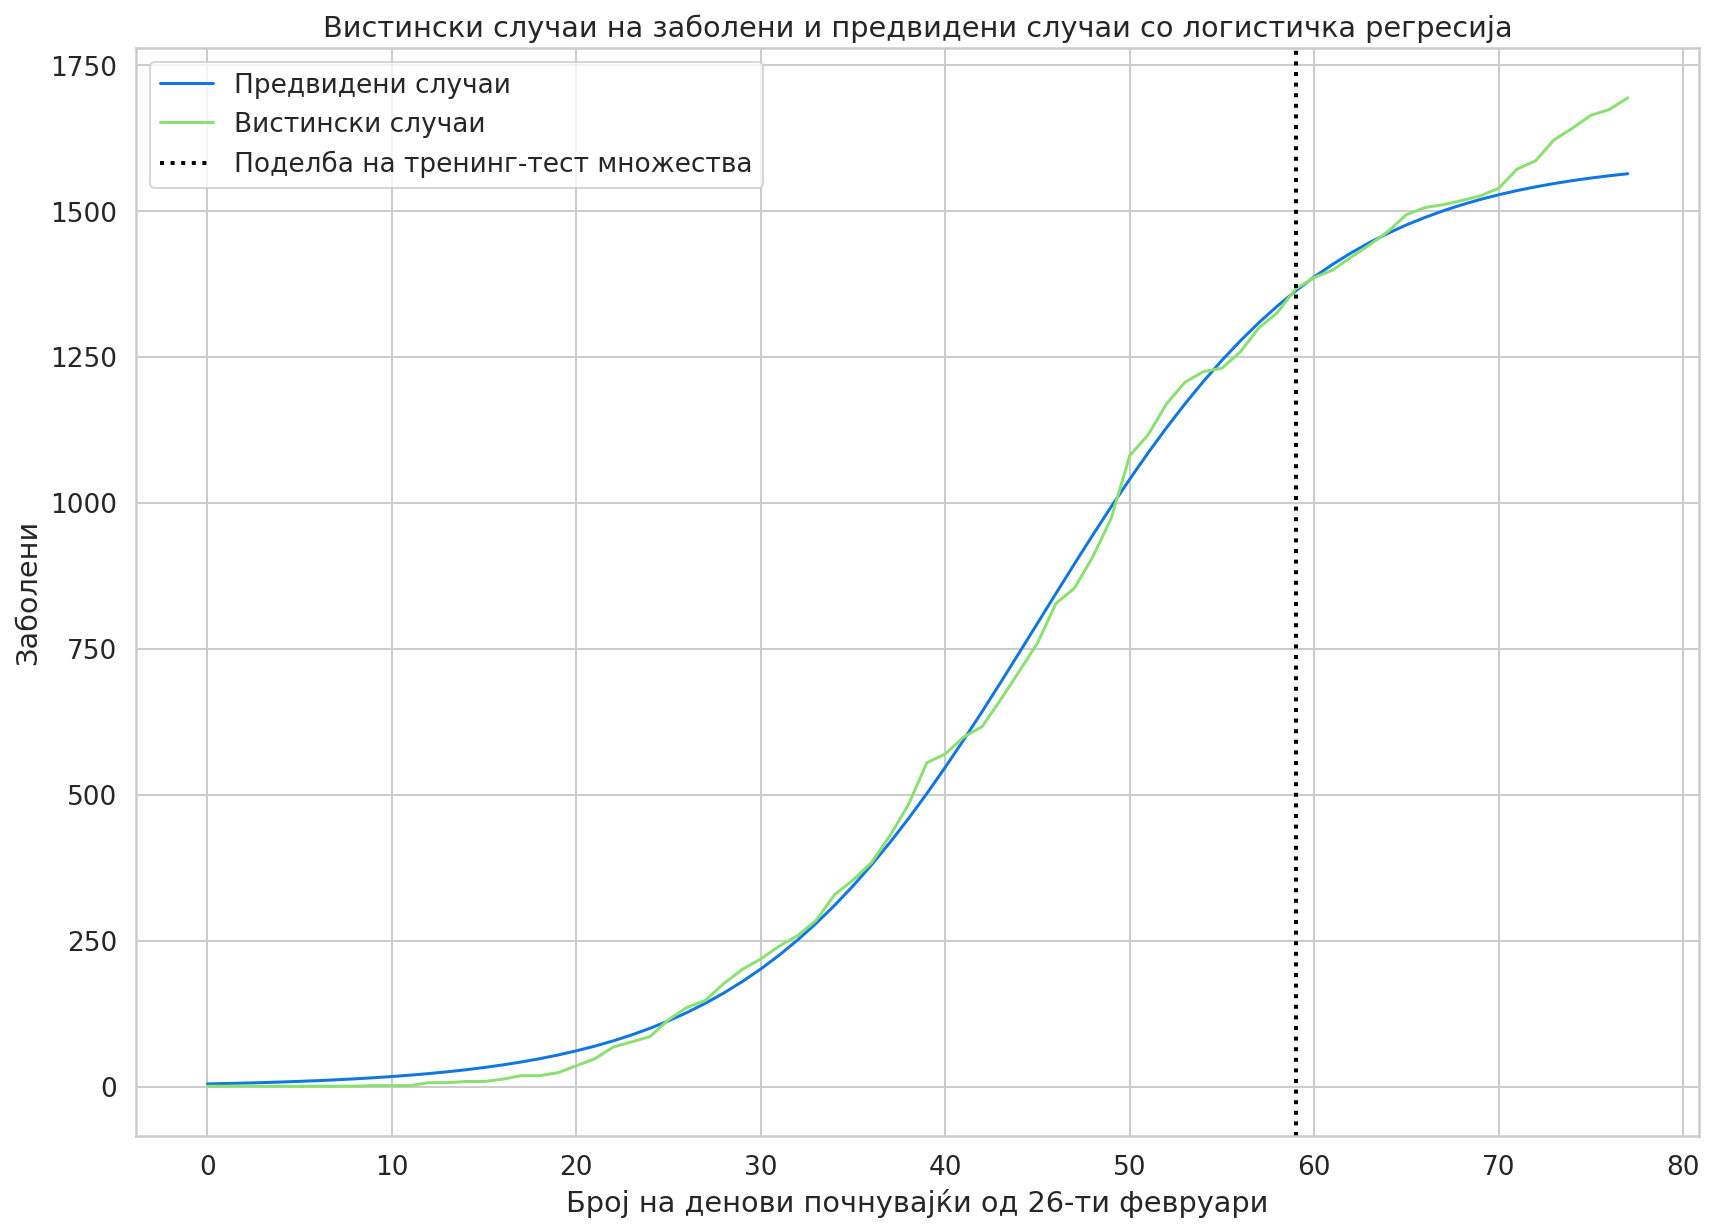

In [39]:
forecast = logistic_function(list(range(len(x)+18)), a_, b_, c_, d_)
tr = covid19_mk_df['Заболени']
fcst = forecast[:len(tr)]
dates = list(range(0,len(tr)))
    
# Визуелно прикажување на резултатите
figure, (b) = plt.subplots(1, 1)
b.plot(dates, fcst)
b.plot(dates, tr)
b.axvline(len(tr)-number_valid-1, linewidth=2, ls = ':', color='black')
b.set_title("Вистински случаи на заболени и предвидени случаи со логистичка регресија")
b.legend(['Предвидени случаи', 'Вистински случаи', 'Поделба на тренинг-тест множества'], loc='upper left')
b.set_xlabel("Број на денови почнувајќи од 26-ти февруари")
b.set_ylabel("Заболени")

# Предвидување со LSTM

Употреба на Deep Learning веројатно не е најсоодветно решение за модел во моментов, бидејќи располагаме со многу мал број на податоци, но ме интересираше како би изгледала имплементацијата и какви резултати би добила. Во иднина, кога би имале повеќе податоци, можеби и перформансите на оваа мрежа би се подобриле.

### Претпроцесирање на податоците

Во моментов располагам со податоци за 78 дена. Ќе ги земам сите податоци за тренирање на моделот, бидејќи се малку. 

In [0]:
train_d = cov_mk['Заболени']

Пред да се тренира невронска мрежа, податоците треба да се скалираат за поголема ефикасност. Јас ќе направам нормализација на податоците, односно ќе ги скалирам во ранг од 0 до 1. За тоа ќе го употребам ```sklearn``` објектот ```MinMaxScaler```. Најпрвин се повикува **.fit()** функцијата за да се естимираат минималните и максималните вредности. Потоа, за да се примени скалирањето на податоците се повикува функцијата **.transform()**.

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(train_d, axis=1))

train_d = scaler.transform(np.expand_dims(train_d, axis=1))

Следно со помош на ```torch``` ги трансформирам податоците во вид на тензори и со тоа претпроцесирањето на податоците е завршено и може да се гради моделот.

In [0]:
import torch
from tqdm import tqdm
from torch import nn, optim

np.random.seed(52)
torch.manual_seed(52)

seq_length = 5
x_seq = []
y_seq = []

for i in range(len(train_d)-seq_length-1):
    x = train_d[i:(i+seq_length)]
    y = train_d[i+seq_length]
    x_seq.append(x)
    y_seq.append(y)

X_train = np.array(x_seq)
y_train = np.array(y_seq)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

### Градење на модел

Мрежата ќе биде stateless, односно цело време ќе се ресетира состојбата (затоа ми треба reset_state функцијата).

In [0]:
class COVID19_Predict(nn.Module):

  def __init__(self, n_features, n_hidden, seq_len, n_layers=3):
    super(COVID19_Predict, self).__init__()

    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers

    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.5
    )

    self.linear = nn.Linear(in_features=n_hidden, out_features=1)

  def reset_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )

  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

Следно креирам инстанца од моделот.

In [0]:
model = COVID19_Predict(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=3
)

### Тренирање на моделот



In [45]:
loss_f = torch.nn.MSELoss(reduction='sum')

optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 80

train_histogram = np.zeros(num_epochs)

for t in range(num_epochs):
  model.reset_state()

  y_predict = model(X_train)

  loss = loss_f(y_predict.float(), y_train)

  if t % 10 == 0:
    print(f'Epoch {t} loss: {loss.item()}')

  train_histogram[t] = loss.item()
    
  optimiser.zero_grad()

  loss.backward()

  optimiser.step()
  
model = model.eval()

Epoch 0 loss: 6.826882839202881
Epoch 10 loss: 2.6351022720336914
Epoch 20 loss: 2.678489923477173
Epoch 30 loss: 2.622910499572754
Epoch 40 loss: 2.5744783878326416
Epoch 50 loss: 2.5606861114501953
Epoch 60 loss: 2.271320343017578
Epoch 70 loss: 2.1755058765411377


### Предвидување на новозаразени од корона за наредните 10 дена

In [46]:
with torch.no_grad():
  seq = X_train[:1]
  predictions = []
  for a in range(10):
    p = model(seq)
    prediction = torch.flatten(p).item()
    predictions.append(prediction)
    new_sequence = seq.numpy().flatten()
    new_sequence = np.append(new_sequence, [prediction])
    new_sequence = new_sequence[1:]
    seq = torch.as_tensor(new_sequence).view(1, seq_length, 1).float()

cases_pred = scaler.inverse_transform(
  np.expand_dims(predictions, axis=0)
).flatten()


index_pred = pd.date_range(
  start='2020-05-13',
  periods=11,
  closed='right'
)

predicted_cases = pd.Series(
  data=cases_pred,
  index=index_pred
)

predicted_cases

2020-05-14    23.661119
2020-05-15    23.008816
2020-05-16    22.293390
2020-05-17    21.536365
2020-05-18    20.821851
2020-05-19    20.217248
2020-05-20    19.761957
2020-05-21    19.473646
2020-05-22    19.353335
2020-05-23    19.387802
Freq: D, dtype: float64

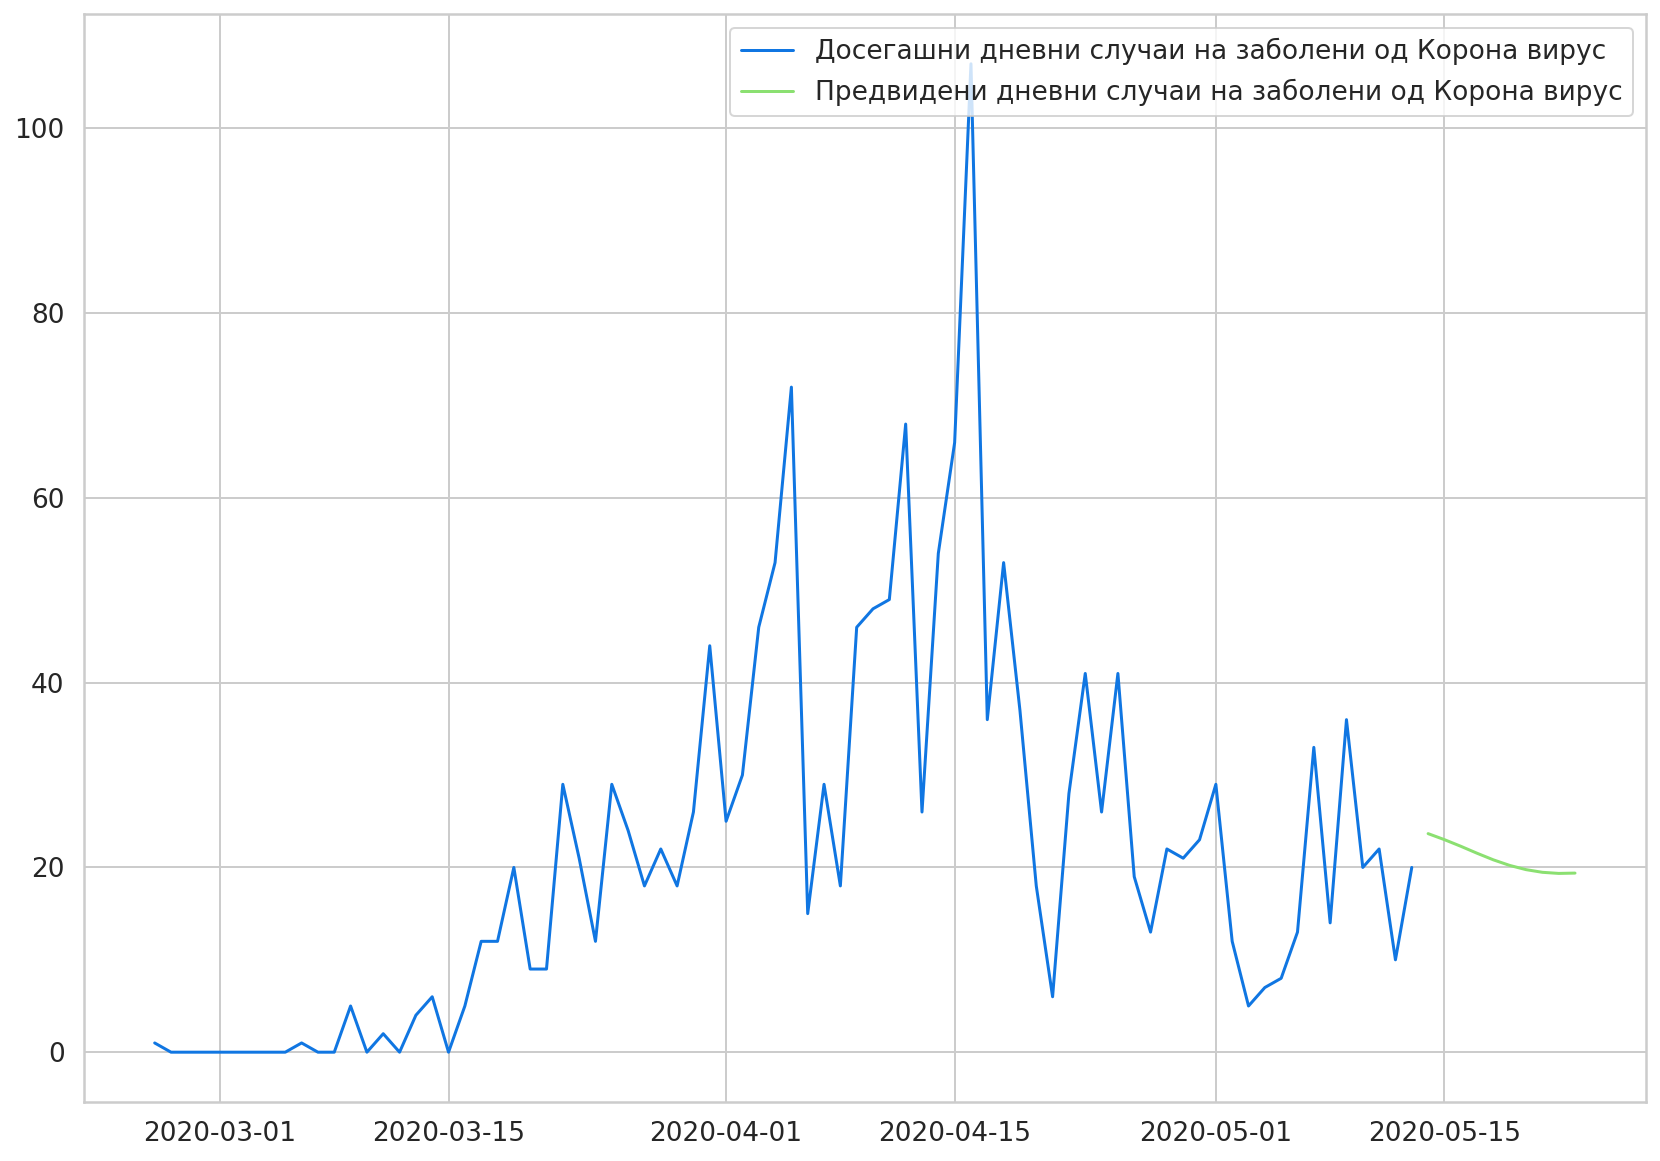

In [47]:
new = cov_mk.drop(['Датум', 'Излечени', 'Починати'], axis=1)
new.index = cov_mk['Датум']

plt.plot(new, label='Досегашни дневни случаи на заболени од Корона вирус')
plt.plot(predicted_cases, label='Предвидени дневни случаи на заболени од Корона вирус')
plt.legend();